In [2]:
import pandas as pd

IMPORTING THE TWO DATASETS

In [3]:
data_2k = pd.read_excel("NBA_2k18_All_Players_Master.xls")

In [4]:
data_2k.head()
# data_2k.fillna("N/A").head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,Rating,All Time Team?,Duplicate?,Nearest City
0,3.0,Allen Iverson,PG,76ers,2005/2006,30,"Hampton, Virginia",1996,Georgetown University,1.0,97,*,NaN,Virginia Beach
1,6.0,Julius Erving,SF,76ers,1979/1980,29,"Roosevelt, New York",1972,University of Massachusetts Amherst,12.0,94,*,NaN,Brooklyn
2,3.0,Allen Iverson,SG,76ers,2000/2001,25,"Hampton, Virginia",1996,Georgetown University,1.0,94,NaN,NaN,Virginia Beach
3,6.0,Julius Erving,SF,76ers,1976/1977,26,"Roosevelt, New York",1972,University of Massachusetts Amherst,12.0,94,NaN,NaN,Brooklyn
4,13.0,Wilt Chamberlain,C,76ers,1965/1966,29,"Philadelphia, Pennsylvania",Territorial,University of Kansas,NaN,93,*,NaN,Philadelphia


In [5]:
players = pd.read_html("2017-18NBAdata.html")
players = players[0]
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,0.395,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,0.629,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,0.512,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,0.401,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


MANIPULATING THE DATA_2K FILE TO CLEAN UP FOR THE MERGE

In [6]:
modern_2k = data_2k[data_2k['Year'] == '2017/2018']
modern_2k.sort_values(by='Rating', ascending=False).head()
# modern_2k

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,Rating,All Time Team?,Duplicate?,Nearest City
206,23.0,LeBron James,SF,Caveliers,2017/2018,32,"Akron, Ohio",2003,NaN,1.0,97,NaN,NaN,Cleveland
1286,13.0,James Harden,SG,Rockets,2017/2018,28,"Los Angeles, California",2009,Arizona State University,3.0,96,NaN,NaN,Los Angeles
1571,30.0,Stephen Curry,PG,Warriors,2017/2018,29,"Akron, Ohio",2009,Davidson College,7.0,96,NaN,NaN,Cleveland
1570,35.0,Kevin Durant,SF,Warriors,2017/2018,29,Washington DC,2007,University of Texas at Austin,2.0,96,NaN,NaN,Washington DC
53,34.0,Giannis Antetokounmpo,SF,Bucks,2017/2018,22,Greece,2013,NaN,15.0,95,NaN,NaN,Greece


In [7]:
players = players.drop_duplicates(subset = 'Player',keep='first')
players.sort_values(by='PTS', ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
232,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,0.449,...,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
148,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,0.534,...,0.828,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1
303,LeBron James,PF,33,CLE,82,82,36.9,10.5,19.3,0.542,...,0.731,1.2,7.5,8.6,9.1,1.4,0.9,4.2,1.7,27.5
15,Giannis Antetokounmpo,PF,23,MIL,75,75,36.7,9.9,18.7,0.529,...,0.760,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9
369,Damian Lillard,PG,27,POR,73,73,36.6,8.5,19.4,0.439,...,0.916,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9


MERGING THE TWO DATAFRAMES TOGETHER AND CLEANING UP THE DATA SOME MORE

In [8]:
combined_data = pd.merge(modern_2k, players, on='Player', how='inner')
combined_data.sort_values(by='PTS', ascending=False).head()

,Jersey No,Player,Pos_x,Org Team,Year,Age_x,Born,Year Drafted,College,Pick No,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
384,13.0,James Harden,SG,Rockets,2017/2018,28,"Los Angeles, California",2009,Arizona State University,3.0,...,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
338,23.0,Anthony Davis,PF,Pelicans,2017/2018,24,"Chicago, Illinois",2012,University of Kentucky,1.0,...,0.828,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1
51,23.0,LeBron James,SF,Caveliers,2017/2018,32,"Akron, Ohio",2003,NaN,1.0,...,0.731,1.2,7.5,8.6,9.1,1.4,0.9,4.2,1.7,27.5
17,34.0,Giannis Antetokounmpo,SF,Bucks,2017/2018,22,Greece,2013,NaN,15.0,...,0.760,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9
464,0.0,Damian Lillard,PG,Trail Blazers,2017/2018,27,"Oakland, California",2012,Weber State University,6.0,...,0.916,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9


Dropping and renaming the duplicate and unnecessary columns

In [9]:
combined_data = combined_data.drop(columns='Age_y')  #cannot run more than once, will return error
combined_data = combined_data.drop(columns='Pos_y')
combined_data = combined_data.drop(columns=['Duplicate?', 'Tm', 'Nearest City', 'All Time Team?'])
# list(combined_data.columns.values)

In [10]:
combined_data = combined_data.rename(columns={'Pos_x':'Pos', 'Age_x':'Age'})
combined_data.head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21.0,Joel Embiid,C,76ers,2017/2018,23,Cameroon,2014,University of Kansas,3.0,...,0.769,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9
1,25.0,Ben Simmons,PG,76ers,2017/2018,21,Austrailia,2016,Louisiana State University,1.0,...,0.560,1.8,6.3,8.1,8.2,1.7,0.9,3.4,2.6,15.8
2,9.0,Dario Saric,PF,76ers,2017/2018,23,Croatia,2014,NaN,12.0,...,0.860,2.0,4.7,6.7,2.6,0.7,0.3,1.9,2.1,14.6
3,33.0,Robert Covington,SF,76ers,2017/2018,26,"Bellwood, Illinois",Undrafted,Tennessee State University,NaN,...,0.853,0.7,4.7,5.4,2.0,1.7,0.9,1.6,3.0,12.6
4,17.0,J.J. Redick,SG,76ers,2017/2018,33,"Cookeville, Tennessee",2006,Duke University,11.0,...,0.904,0.1,2.4,2.5,3.0,0.5,0.1,1.5,1.8,17.1


In [11]:
list(combined_data.columns.values)

['Jersey No',
 'Player',
 'Pos',
 'Org Team',
 'Year',
 'Age',
 'Born',
 'Year Drafted',
 'College',
 'Pick No',
 'Rating',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [12]:
# combined_data[''] #create totals columns?

Creating a FGM column (Fielg Goals Missed) and a FTM column (Free Throws Missed)

In [13]:
combined_data['FGM'] = combined_data['FGA'] - combined_data['FG']
combined_data['FTM'] = combined_data['FTA'] - combined_data['FT']
combined_data.head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FGM,FTM
0,21.0,Joel Embiid,C,76ers,2017/2018,23,Cameroon,2014,University of Kansas,3.0,...,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,8.7,1.7
1,25.0,Ben Simmons,PG,76ers,2017/2018,21,Austrailia,2016,Louisiana State University,1.0,...,6.3,8.1,8.2,1.7,0.9,3.4,2.6,15.8,5.6,1.8
2,9.0,Dario Saric,PF,76ers,2017/2018,23,Croatia,2014,NaN,12.0,...,4.7,6.7,2.6,0.7,0.3,1.9,2.1,14.6,6.2,0.4
3,33.0,Robert Covington,SF,76ers,2017/2018,26,"Bellwood, Illinois",Undrafted,Tennessee State University,NaN,...,4.7,5.4,2.0,1.7,0.9,1.6,3.0,12.6,6.2,0.2
4,17.0,J.J. Redick,SG,76ers,2017/2018,33,"Cookeville, Tennessee",2006,Duke University,11.0,...,2.4,2.5,3.0,0.5,0.1,1.5,1.8,17.1,6.8,0.3


Defining a function to calculate player PER, used to judge improvement or digression during the 2017-18 NBA season, PER calculation taken from https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess to calculate the efficiency metric given the data from my datasets.

In [14]:
def PER(data):
    score = 0.0
    score = data['FG']*85.91 + data['STL']*53.897 + data['3P']*51.757 + data['FT']*46.845 \
    + data['BLK']*39.19 + data['ORB']*39.190 + data['AST']*34.677 + data['DRB']*14.707 \
    - data['PF'] * -17.714 - data['FTM']* -20.091 - data['FGM']* -39.190 - data['TOV']* -53.897
    final = score / 82
    return final

In [15]:
combined_data['PER'] = combined_data[['FG','STL','3P','FT','BLK','ORB','AST','DRB',\
                                      'PF','FTM','FGM','TOV']].apply(PER, axis=1)
combined_data.sort_values('PER', ascending = False).head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,...,TRB,AST,STL,BLK,TOV,PF,PTS,FGM,FTM,PER
384,13.0,James Harden,SG,Rockets,2017/2018,28,"Los Angeles, California",2009,Arizona State University,3.0,...,5.4,8.8,1.8,0.7,4.4,2.3,30.4,11.1,1.4,32.158300
434,0.0,Russell Westbrook,PG,Thunder/Sonics,2017/2018,28,"Long Beach, California",2008,"University of California, Los Angeles",4.0,...,10.1,10.3,1.8,0.3,4.8,2.5,25.4,11.6,1.9,31.446561
339,0.0,DeMarcus Cousins,C,Pelicans,2017/2018,27,"Mobile, Alabama",2010,University of Kentucky,5.0,...,12.9,5.4,1.6,1.6,5.0,3.8,25.2,9.5,2.1,30.011306
51,23.0,LeBron James,SF,Caveliers,2017/2018,32,"Akron, Ohio",2003,NaN,1.0,...,8.6,9.1,1.4,0.9,4.2,1.7,27.5,8.8,1.8,29.713709
17,34.0,Giannis Antetokounmpo,SF,Bucks,2017/2018,22,Greece,2013,NaN,15.0,...,10.0,4.8,1.5,1.4,3.0,3.1,26.9,8.8,2.0,27.924759


Function to calculate improvement or digression for each player - League average PER = 15, below that a player is downgraded, above that they are upgraded (depending on previous rating)

In [16]:
def improvement(data):
    rating = 0
#     if data['G'] < 10:
#         rating = -3
#     else:
    if data['PER'] >=25.0 and data['Rating'] >= 90:
        rating = 2
    elif data['PER'] >=25.0 and data['Rating'] >= 85 and data['Rating'] < 90:
        rating = 4
    elif data['PER'] >=25.0 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = 7
    elif data['PER'] >=25.0 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = 12
    elif data['PER'] >=25.0 and data['Rating'] >= 65 and data['Rating'] < 70:
        rating = 20
    elif data['PER'] >= 20.0 and data['PER'] < 25.0 and data['Rating'] >= 90:
        rating = 2
    elif data['PER'] >= 20.0 and data['PER'] < 25.0 and data['Rating'] >= 85 and data['Rating'] < 90:
        rating = 3
    elif data['PER'] >= 20.0 and data['PER'] < 25.0 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = 5
    elif data['PER'] >= 20.0 and data['PER'] < 25.0 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = 10
    elif data['PER'] >= 20.0 and data['PER'] < 25.0 and data['Rating'] >= 65 and data['Rating'] < 70:
        rating = 16
    elif data['PER'] >=17.5 and data['PER'] < 20.0 and data['Rating'] >= 90:
        rating = 0
    elif data['PER'] >= 17.5 and data['PER'] < 20.0 and data['Rating'] >= 85 and data['Rating'] < 90:
        rating = 1
    elif data['PER'] >= 17.5 and data['PER'] < 20.0 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = 2
    elif data['PER'] >= 17.5 and data['PER'] < 20.0 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = 5
    elif data['PER'] >= 17.5 and data['PER'] < 20.0 and data['Rating'] >= 65 and data['Rating'] < 70:
        rating = 14
    elif data['PER'] >=15.0 and data['PER'] < 17.5 and data['Rating'] >= 90:
        rating = -3
    elif data['PER'] >= 15.0 and data['PER'] < 17.5 and data['Rating'] >= 85 and data['Rating'] < 80:
        rating = -1
    elif data['PER'] >= 15.0 and data['PER'] < 17.5 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = 0
    elif data['PER'] >= 15.0 and data['PER'] < 17.5 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = 6
    elif data['PER'] >= 15.0 and data['PER'] < 17.5 and data['Rating'] >= 65 and data['Rating'] < 70:
        rating = 12
    elif data['PER'] >=10.0 and data['PER'] < 15.0 and data['Rating'] >= 90:
        rating = -7
    elif data['PER'] >= 10.0 and data['PER'] < 15.0 and data['Rating'] >= 85 and data['Rating'] < 90:
        rating = -5
    elif data['PER'] >= 10.0 and data['PER'] < 15.0 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = -3
    elif data['PER'] >= 10.0 and data['PER'] < 15.0 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = 0
    elif data['PER'] >= 10.0 and data['PER'] < 15.0 and data['Rating'] >= 65 and data['Rating'] < 70:
        rating = 1
    elif data['PER'] >=5.0 and data['PER'] < 10.0 and data['Rating'] >= 90:
        rating = -10
    elif data['PER'] >= 5.0 and data['PER'] < 10.0 and data['Rating'] >= 85 and data['Rating'] < 90:
        rating = -8
    elif data['PER'] >= 5.0 and data['PER'] < 10.0 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = -6
    elif data['PER'] >= 5.0 and data['PER'] < 10.0 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = -2
    elif data['PER'] >= 5.0 and data['PER'] < 10.0 and data['Rating'] >= 65 and data['Rating'] < 70:
        rating = 0
    elif data['PER'] >=0.0 and data['PER'] < 5.0 and data['Rating'] >= 90:
        rating = -15
    elif data['PER'] >= 0.0 and data['PER'] < 5.0 and data['Rating'] >= 85 and data['Rating'] < 90:
        rating = -11
    elif data['PER'] >= 0.0 and data['PER'] < 5.0 and data['Rating'] >= 80 and data['Rating'] < 85:
        rating = -9
    elif data['PER'] >= 0.0 and data['PER'] < 5.0 and data['Rating'] >= 70 and data['Rating'] < 80:
        rating = -4
    else:
        rating = -2
    return rating

#edit to account for if a player did not play many games/ was injured ex) Gordon Hayward dropping 11 ratings

In [17]:
combined_data['improvement'] = combined_data[['PER', 'Rating', 'G']].apply(improvement, axis=1)
combined_data.sort_values('improvement', ascending=False).head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,...,AST,STL,BLK,TOV,PF,PTS,FGM,FTM,PER,improvement
420,2.0,Elfrid Payton,PG,Suns,2017/2018,23,"Grenta, Louisiana",2014,University of Louisiana at Lafayette,10.0,...,6.2,1.3,0.3,2.7,2.3,12.7,5.4,1.0,16.521606,6
184,5.0,Nicolas Batum,SF,Hornets,2017/2018,28,France,2008,NaN,25.0,...,5.5,1.0,0.4,2.0,1.1,11.6,6.0,0.3,15.052315,6
89,8.0,Danilo Gallinari,SF,Clippers,2017/2018,29,Italy,2008,NaN,6.0,...,2.0,0.6,0.5,1.2,1.4,15.3,7.3,0.2,15.523129,6
201,3.0,Ricky Rubio,PG,Jazz,2017/2018,27,Spain,2009,NaN,5.0,...,5.3,1.6,0.1,2.7,2.7,13.1,6.2,0.4,16.892711,6
247,0.0,Kyle Kuzma,PF,Lakers,2017/2018,22,"Flint, Michigan",2017,University of Utah,27.0,...,1.8,0.6,0.4,1.8,2.1,16.1,7.4,0.8,16.958372,6


Creating the new rating for the next NBA 2k game

In [18]:
combined_data['New_Rating'] = combined_data['Rating'] + combined_data['improvement']
rating_index = combined_data.set_index('New_Rating').sort_values('improvement', ascending=True)
rating_index.head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,...,AST,STL,BLK,TOV,PF,PTS,FGM,FTM,PER,improvement
New_Rating,,,,,,,,,,,,,,,,,,,,,
77,20.0,Gordon Hayward,SF,Celtics,2017/2018,27,"Indianapolis, Indiana",2010,Butler University,9.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.920988,-11
80,17.0,Jonas Valanciunas,C,Raptors,2017/2018,25,Lithuania,2011,NaN,5.0,...,1.1,0.4,0.9,1.5,2.5,12.7,3.8,0.5,13.734326,-5
72,NaN,Willie Reed,C,Free Agency,2017/2018,27,"Kansas City, Missouri",Undrafted,Saint Louis University,NaN,...,0.2,0.2,0.5,0.5,1.3,4.6,1.0,0.5,4.853573,-4
68,NaN,Derrick Williams,SF,Free Agency,2017/2018,26,"Bellflower, California",2011,University of Arizona,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.5,0.0,1.330409,-4
69,NaN,Mindaugas Kuzminskas,PF,Free Agency,2017/2018,29,Lithuania,Undrafted,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.955854,-4


In [19]:
combined_data.sort_values('New_Rating', ascending=False).head()

,Jersey No,Player,Pos,Org Team,Year,Age,Born,Year Drafted,College,Pick No,...,STL,BLK,TOV,PF,PTS,FGM,FTM,PER,improvement,New_Rating
51,23.0,LeBron James,SF,Caveliers,2017/2018,32,"Akron, Ohio",2003,NaN,1.0,...,1.4,0.9,4.2,1.7,27.5,8.8,1.8,29.713709,2,99
478,35.0,Kevin Durant,SF,Warriors,2017/2018,29,Washington DC,2007,University of Texas at Austin,2.0,...,0.7,1.8,3.0,2.0,26.4,8.7,0.6,26.048855,2,98
384,13.0,James Harden,SG,Rockets,2017/2018,28,"Los Angeles, California",2009,Arizona State University,3.0,...,1.8,0.7,4.4,2.3,30.4,11.1,1.4,32.158300,2,98
479,30.0,Stephen Curry,PG,Warriors,2017/2018,29,"Akron, Ohio",2009,Davidson College,7.0,...,1.6,0.2,3.0,2.2,26.4,8.5,0.4,26.051595,2,98
17,34.0,Giannis Antetokounmpo,SF,Bucks,2017/2018,22,Greece,2013,NaN,15.0,...,1.5,1.4,3.0,3.1,26.9,8.8,2.0,27.924759,2,97


Creating the visualizations

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

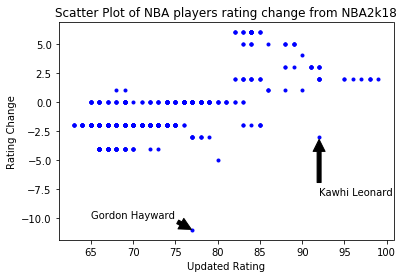

In [21]:
plt.plot(combined_data['New_Rating'], combined_data['improvement'], 'b.')
plt.xlabel('Updated Rating')
plt.ylabel('Rating Change')
plt.title('Scatter Plot of NBA players rating change from NBA2k18')
plt.annotate('Gordon Hayward', xy=(77,-11), xytext=(65,-10), arrowprops=dict(facecolor='black', shrink=0.05)) #Having issues annotating
plt.annotate('Kawhi Leonard', xy=(92, -3), xytext=(92, -8), arrowprops=dict(facecolor='black', shrink=.05))
plt.savefig('scatter_plot.png')
plt.show()

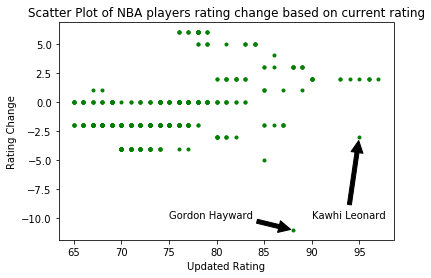

In [26]:
plt.plot(combined_data['Rating'], combined_data['improvement'], 'g.')
plt.xlabel('Updated Rating')
plt.ylabel('Rating Change')
plt.title('Scatter Plot of NBA players rating change based on current rating')
plt.annotate('Gordon Hayward', xy=(88,-11), xytext=(75,-10), arrowprops=dict(facecolor='black', shrink=0.05)) #Having issues annotating
plt.annotate('Kawhi Leonard', xy=(95,-3), xytext=(90,-10), arrowprops=dict(facecolor='black', shrink=0.05)) #Having issues annotating
plt.savefig('scatter_plot2.png')
plt.show()

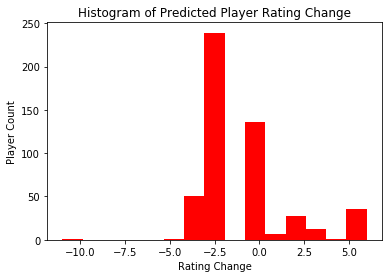

In [23]:
plt.hist(combined_data['improvement'], bins=15, color='red')
plt.xlabel('Rating Change')
plt.ylabel('Player Count')
plt.title('Histogram of Predicted Player Rating Change')
plt.savefig('improvement_histogram.png')
plt.show()

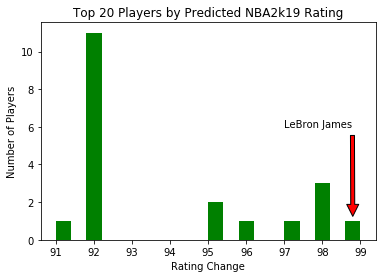

In [24]:
plt.hist(combined_data['New_Rating'].sort_values(ascending=False).head(20), bins=20, color='green')
plt.annotate('LeBron James', xy=(98.8,1), xytext=(97,6), arrowprops=dict(facecolor='red',shrink=0.05))#--> Won't displayax.xlabel('Predicted Ratings')
# plt.annotate('Giannis', xy=(97.4), xytext=(96.5, 4), arrowprops=dict(facecolor='blue',shrink=0.05))
plt.xlabel('Rating Change')
plt.ylabel('Number of Players')
plt.title('Top 20 Players by Predicted NBA2k19 Rating')
plt.savefig('predicted_rating_histogram.png')
plt.show()

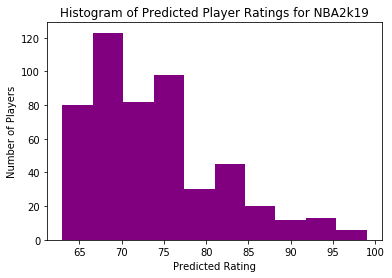

In [28]:
plt.hist(combined_data['New_Rating'], histtype='barstacked', bins=10, color='purple')
plt.xlabel('Predicted Rating')
plt.ylabel('Number of Players')
plt.title('Histogram of Predicted Player Ratings for NBA2k19')
plt.savefig('new_rating_histogram.png')
plt.show()
#majority of players in the 65-80 range